# Summary Documentation
Importing all required packages Reading csv file. Checking the info of dataframe. Checking the null values and datatype of each column

Heatmap to show correlation.
*Number of Funding rounds and Total Funding Amount have highest correlation of 0.3*

Countplot to show highest occurence by category. *Software & Hardware category has the highest count*

Countplot to show highest occurence by cause. *Competition and Bad Business Model both have the highest number of counts.*

Barplot to show Total Funding Amount per Failed Startup. *Quibi and Theranos have the highest total funding.*

Barplot to show count of categories by outcome. *Almost all the categories have highest cause 'Shut Down'.*

Barplot to show mean funding amount by cause. *Startups with low funding have 'Bad Management' and 'Dependece on others' as causes of faliure, while startups with high funding have 'Multiple reasons' and 'Legal Challenges' as causes of faliure.*

Countplot to show count of startups by year_closed.
*Most number of startups were closed in the year 2015*


# Importing all required packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  #for data visualization
import seaborn as sns #for data visualization
import plotly.express as px
import plotly.graph_objs as go

# EDA

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/OmdenaAI/omdena-pennsylvania-startup/main/src/tasks/task-2-data-cleaning/cleaned-datasets/cleaned_failory_cemetery_failedstartups.csv?token=AJ7LPDUWHSNQH7JQEYSL5Y3A5VBBU')
df.head()

,failed_startup,short_description,category,country,year_start,year_closed,outcome,cause,num_founders,name_founders,num_employees,num_funding_rounds,total_funding_amount,num_investors,full_description,full_failure_cause
0,Rafter,Textbook and course material provider for schools,Education,United States,2006,2016,Acquired,Competition,1,Sara Leoni,50 to 100,7,86000000.0,7,Rafter was a textbook and course material prov...,Rafter had much competition from the start and...
1,Skully,Augmented reality motorcycle helmets,Transportation,United States,2013,2016,Shut Down,Mismanagement of Funds,1,"Marcus Weller, Mitch Weller",10 to 50,4,15000000.0,13,Skully is a helmet trademark which targets mot...,According to Skully spokespeople they had to c...
2,Wantful,Online gift-giving service,e-Commerce,United States,2011,2013,Shut Down,Competition,1,John Poisson,"10,000",1,5500000.0,8,Wantful was an e-Commerce platform founded in ...,After experiencing a brief phase of exponentia...
3,Argyle Social,Provided social media management tools,Marketing,United States,2010,2014,Shut Down,Competition,1,Adam Covati,10 to 50,2,1600000.0,2,The Argyle Social was a Social media marketing...,"Adam Covati, the former CEO and founder of Arg..."
4,QBotix,Solar panels attached and regulated by robots,Software & Hardware,United States,2010,2015,Shut Down,Competition,1,Wasiq Bokhari,10 to 50,3,23500000.0,7,QBotix seemed like a very promising cleantech ...,QBotix had a useful and innovative product. Th...


In [ ]:
df.describe()

,year_start,num_founders,num_funding_rounds,total_funding_amount
count,77.000000,77.000000,77.000000,7.700000e+01
mean,2009.987013,2.337662,3.311688,7.668948e+07
std,3.799216,1.231285,2.329783,2.585145e+08
min,1997.000000,1.000000,1.000000,1.500000e+04
25%,2008.000000,2.000000,2.000000,4.600000e+06
50%,2011.000000,2.000000,3.000000,1.350000e+07
75%,2013.000000,3.000000,4.000000,4.550000e+07
max,2018.000000,7.000000,11.000000,1.800000e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   failed_startup        77 non-null     object 
 1   short_description     77 non-null     object 
 2   category              77 non-null     object 
 3   country               77 non-null     object 
 4   year_start            77 non-null     int64  
 5   year_closed           77 non-null     object 
 6   outcome               77 non-null     object 
 7   cause                 77 non-null     object 
 8   num_founders          77 non-null     int64  
 9   name_founders         77 non-null     object 
 10  num_employees         77 non-null     object 
 11  num_funding_rounds    77 non-null     int64  
 12  total_funding_amount  77 non-null     float64
 13  num_investors         77 non-null     object 
 14  full_description      77 non-null     object 
 15  full_failure_cause    77 

In [ ]:
df.shape

(77, 16)

# Visualisation


Heatmap to show correlation



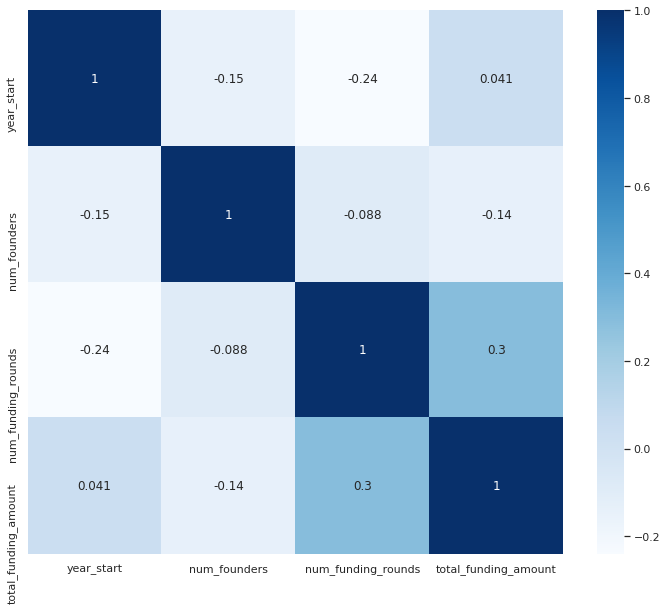

In [53]:

plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), annot=True,cmap='Blues')  # seaborn has very simple solution for heatmap

Countplot to show highest occurence by category

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



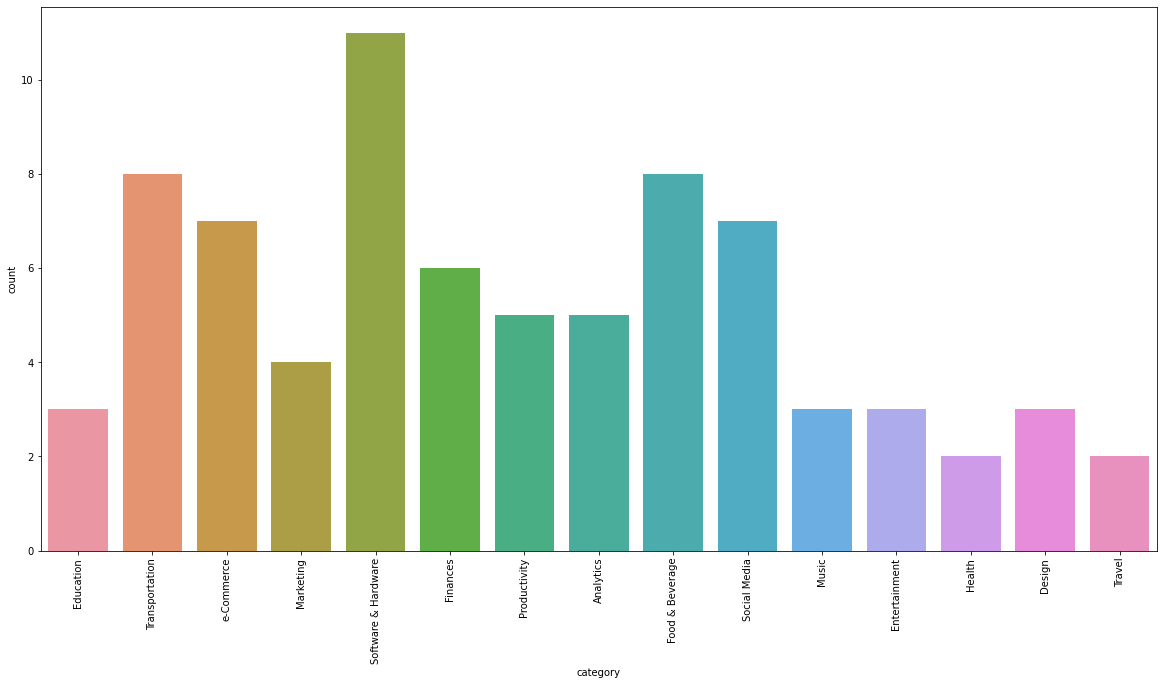

In [ ]:
f,ax = plt.subplots(figsize =(20,10))
sns.countplot(df.category,ax=ax)
plt.xticks(rotation= 90)
plt.show()

Countplot to show highest occurence by cause

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



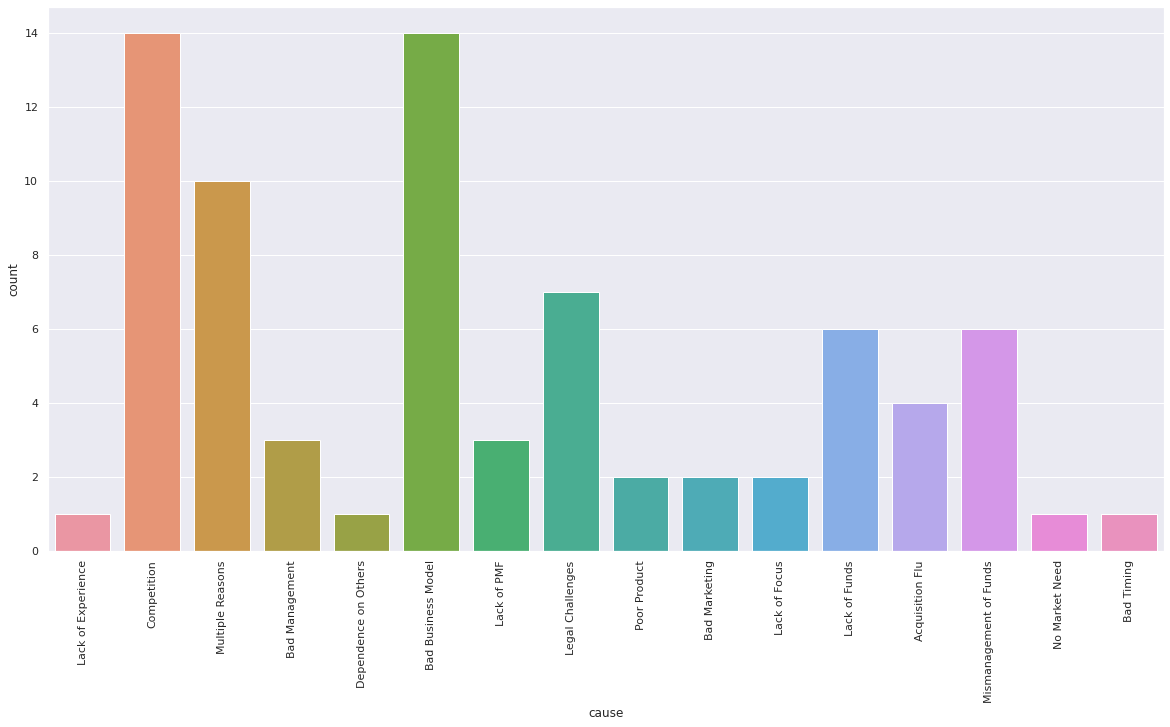

In [51]:
f,ax = plt.subplots(figsize =(20,10))
sns.countplot(df.cause,ax=ax)
plt.xticks(rotation= 90)
plt.show()

Barplot to show Total Funding Amount per Failed Startup

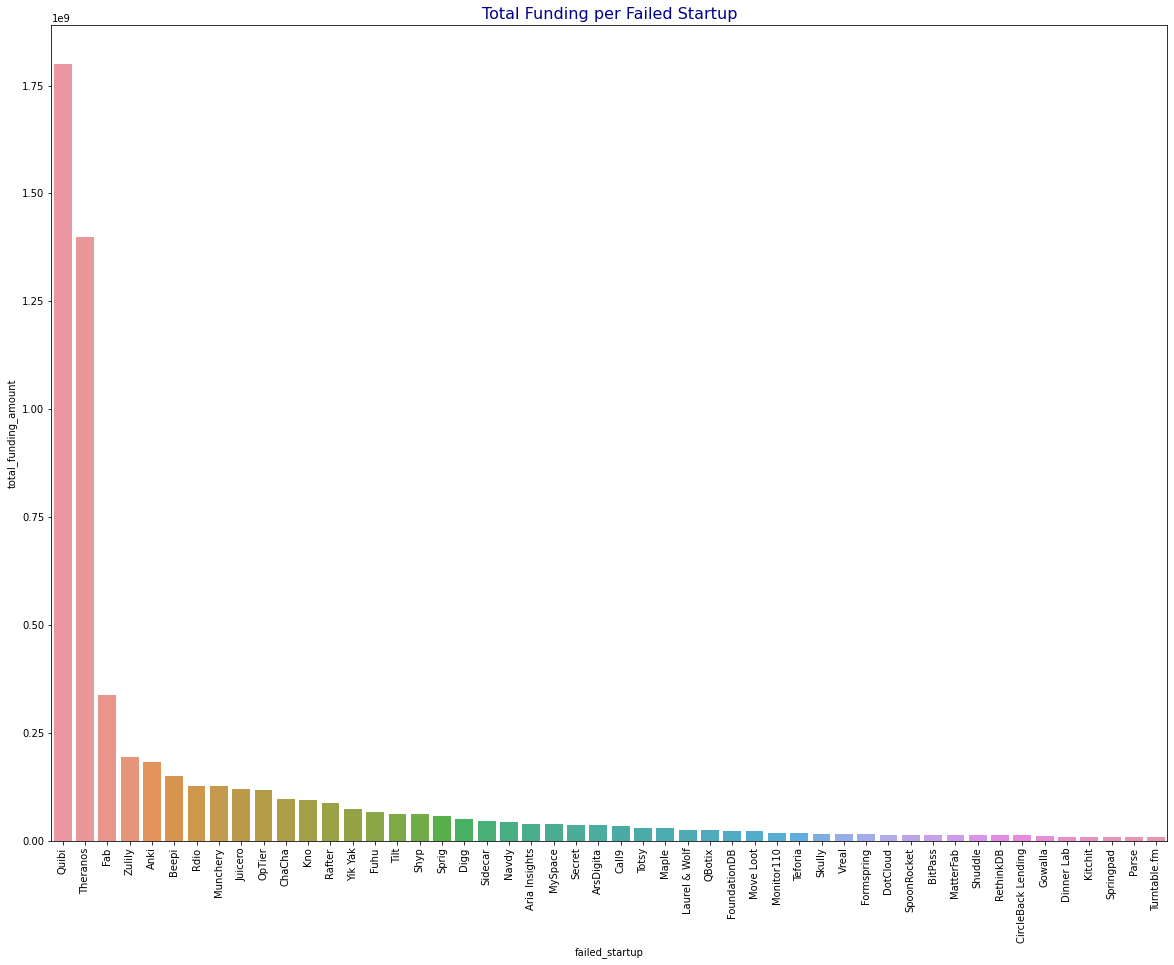

In [ ]:
df2 = pd.DataFrame(columns = ['failed_startup'])
df2["failed_startup"]=[each for each in df['failed_startup'].unique()]
df2["total_funding_amount"]=df['total_funding_amount']
df2=df2.sort_values(by=['total_funding_amount'],ascending=False)

plt.figure(figsize=(20,15))
sns.barplot(x=df2.failed_startup.head(50), y=df2.total_funding_amount.head(50))
plt.xticks(rotation= 90)
plt.xlabel('failed_startup')
plt.ylabel('total_funding_amount')
plt.title('Total Funding per Failed Startup',fontsize=16,color='DarkBlue')
plt.show()

Barplot to show count of categories by outcome

Text(0.5, 1.0, 'Total Images by Subtype')

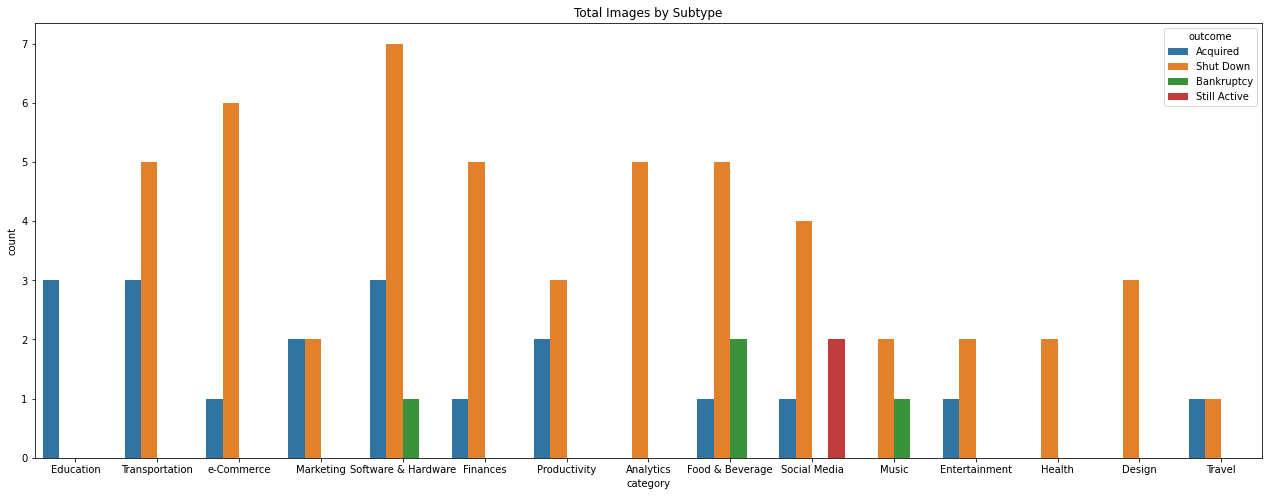

In [ ]:
fig=plt.figure(figsize=(22, 8))

sns.countplot(x="category", hue="outcome", data=df)

plt.title("Total Images by Subtype")


In [ ]:
Barplot to show mean funding amount by cause

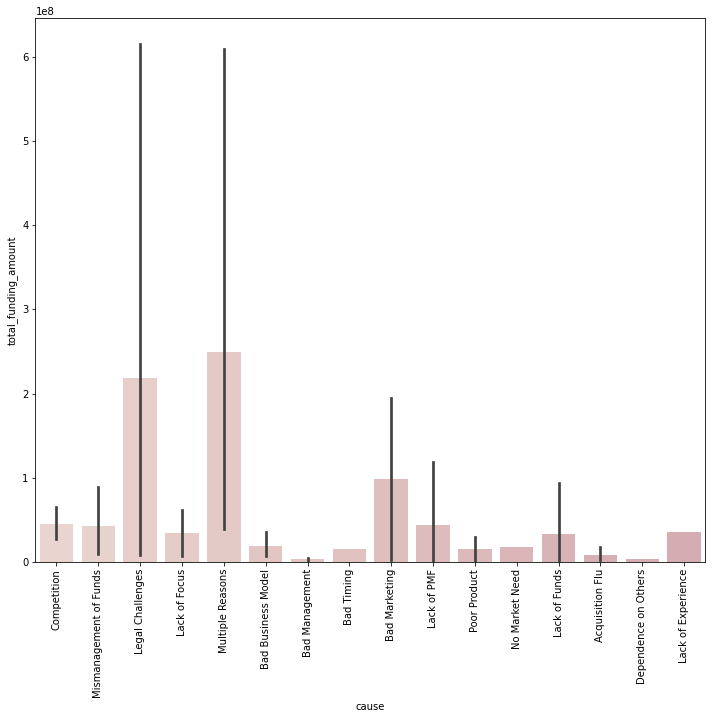

In [ ]:
#Visualization
#Create a new figure and make the size (12,10)
plt.figure(figsize=(12,10))
sns.barplot(x=df['cause'], y=df['total_funding_amount'],palette=sns.cubehelix_palette(len(df['total_funding_amount'])))
plt.xticks(rotation= 90)
plt.xlabel('cause')
plt.ylabel('total_funding_amount')
plt.show()

In [ ]:
Countplot to show count of startups by year_closed

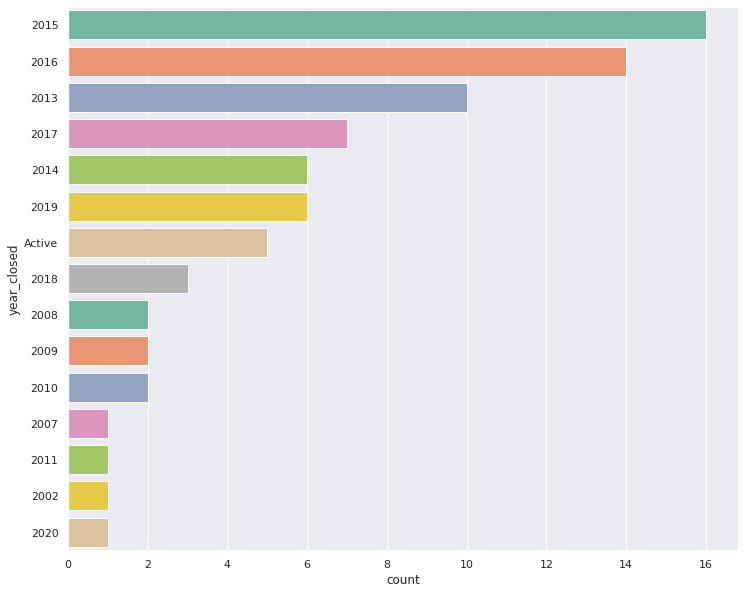

In [49]:
plt.figure(figsize=(12,10))
df = df.sort_values(by=['year_closed'])
df
sns.set(style="darkgrid")
ax = sns.countplot(y="year_closed", data=df, palette="Set2", order=df['year_closed'].value_counts().index[0:15])